# Lexical richness
## Type-token ratio (TTR)

A type-token ratio (TTR) is the total number of UNIQUE words (types) divided by the total number of words (tokens) in a given segment of language.

> Source: https://carla.umn.edu/learnerlanguage/spn/comp/activity4.html

In [1]:
import nltk

nltk.download('book') # dataset which contains a lot of books in English, in a tokenized format

from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

In [2]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [4]:
print(len(text1))

260819


In [9]:
# Vocabulary: unique words
vocabulary = set(text1)
print(sorted(vocabulary)[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [26]:
# TTR calculus
def ttr(text):
  vocabulary = set(text)

  return len(vocabulary) / len(text)

print(ttr(text1))

0.07406285585022564


In [12]:
# Percentage of the occurrence of a word in the tokenized text
def word_percentage(word, text):
  res = text.count(word) / len(text)

  return res * 100

print(text1.count('monster'))
print(word_percentage('monster', text1))

49
0.018786974875296663


In [25]:
# Frequency Distribution

freq_dist = FreqDist(text1)
freq_dist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

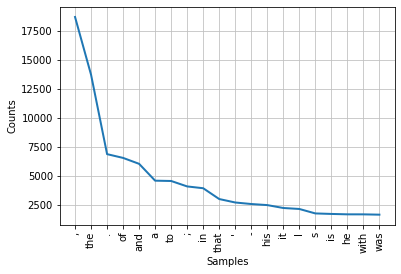

In [19]:
freq_dist.plot(20) # internally using Matplotlib

In [23]:
freq_dist['monster']

49

# Stop words and pre-processing

The process of converting data to something a computer can understand is referred to as **pre-processing**. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data) that do not contribute to any future operations, are referred to as **stop words**.

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

> Source: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [68]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
vocabulary = [w for w in text1 if w.lower() not in stop_words and len(w) > 2]
filtered_vocabulary = sorted(set(vocabulary))
print(len(filtered_vocabulary))
filtered_vocabulary[1000:1050]

18742


['EXCHANGE',
 'EXCHANGING',
 'EXTENDING',
 'EXTRACTS',
 'EYES',
 'EZEKIEL',
 'Eagle',
 'Earl',
 'Earls',
 'Earthsman',
 'East',
 'Eastern',
 'Easy',
 'Ebony',
 'Ecclesiastes',
 'Eckerman',
 'Eddystone',
 'Edgewise',
 'Edmund',
 'Edward',
 'Ego',
 'Egypt',
 'Egyptian',
 'Egyptians',
 'Ehrenbreitstein',
 'Eight',
 'Either',
 'Elbe',
 'Electors',
 'Elephant',
 'Elephanta',
 'Elephants',
 'Elijah',
 'Ellenborough',
 'Elsewhere',
 'Emblazonings',
 'Emboldened',
 'Emir',
 'Emperor',
 'Emperors',
 'Empire',
 'End',
 'Enderbies',
 'Enderby',
 'Enderbys',
 'England',
 'Englander',
 'English',
 'Englishman',
 'Englishmen']

In [69]:
interesting_words = [(word, freq_dist[word]) for word in filtered_vocabulary if freq_dist[word] > 50]
dtypes = [('word', 'U10'), ('frequency', int)]
interesting_words = np.array(interesting_words, dtypes)
interesting_words = np.sort(interesting_words, order='frequency')
interesting_words

array([('Look',  51), ('Right',  51), ('devil',  51), ('less',  51),
       ('run',  51), ('thousand',  51), ('bottom',  52), ('call',  52),
       ('comes',  52), ('forth',  52), ('turning',  52), ('watch',  52),
       ('aloft',  53), ('began',  53), ('curious',  53), ('fellow',  53),
       ('Tashtego',  54), ('close',  54), ('craft',  54),
       ('fishery',  54), ('goes',  54), ('ivory',  54), ('savage',  54),
       ('second',  54), ('turn',  54), ('vessel',  54), ('entire',  55),
       ('find',  55), ('harpooneer',  55), ('Well',  56), ('broad',  56),
       ('chase',  56), ('feel',  56), ('home',  56), ('peculiar',  56),
       ('therefore',  56), ('Indian',  57), ('fine',  57), ('lower',  57),
       ('room',  57), ('rope',  57), ('dark',  58), ('gone',  58),
       ('jaw',  58), ('spout',  58), ('blood',  59), ('short',  59),
       ('better',  60), ('hear',  60), ('live',  60), ('mouth',  60),
       ('best',  62), ('work',  62), ('since',  63), (';--',  64),
       ('Levia

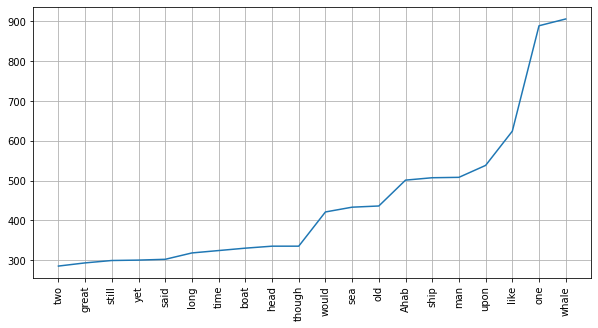

In [70]:
# Using Matplotlib
top_words = 20
# x = np.arange(len(interesting_words[-top_words:]))
x = np.arange(top_words)
y = [freq[1] for freq in interesting_words[-top_words:]]
# x = interesting_words[-top_words:]['word']
# y = interesting_words[-top_words:]['frequency']

plt.figure(figsize=(10, 5))
plt.plot(x, y)
# plt.xticks(x, [freq[0] for freq in interesting_words[-top_words:]], rotation='vertical')
plt.xticks(x, interesting_words[-top_words:]['word'], rotation='vertical')
plt.grid(True)
plt.show()